<div style="background-color:#fad0c4; color:#355c7d; text-align:center; padding:15px; border-radius:15px; font-size:25px; ">Insurance Prediction Analysis</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.set_option("display.max_columns",None)
warnings.filterwarnings("ignore")
train_df = pd.read_csv("/kaggle/input/playground-series-s4e12/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s4e12/test.csv")
train_df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [2]:
print(f"Shape Of the Train Data : {train_df.shape}")
print(f"Shape Of the Test Data : {test_df.shape}")


Shape Of the Train Data : (1200000, 21)
Shape Of the Test Data : (800000, 20)


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    800000 non-null  int64  
 1   Age                   787511 non-null  float64
 2   Gender                800000 non-null  object 
 3   Annual Income         770140 non-null  float64
 4   Marital Status        787664 non-null  object 
 5   Number of Dependents  726870 non-null  float64
 6   Education Level       800000 non-null  object 
 7   Occupation            560875 non-null  object 
 8   Health Score          750551 non-null  float64
 9   Location              800000 non-null  object 
 10  Policy Type           800000 non-null  object 
 11  Previous Claims       557198 non-null  float64
 12  Vehicle Age           799997 non-null  float64
 13  Credit Score          708549 non-null  float64
 14  Insurance Duration    799998 non-null  float64
 15  

In [5]:
categorical_columns  = train_df.select_dtypes(include = "object").columns
for col in categorical_columns:
    print(f"No of Unique Values in {col} : {train_df[col].nunique()}")

No of Unique Values in Gender : 2
No of Unique Values in Marital Status : 3
No of Unique Values in Education Level : 4
No of Unique Values in Occupation : 3
No of Unique Values in Location : 3
No of Unique Values in Policy Type : 3
No of Unique Values in Policy Start Date : 167381
No of Unique Values in Customer Feedback : 3
No of Unique Values in Smoking Status : 2
No of Unique Values in Exercise Frequency : 4
No of Unique Values in Property Type : 3


In [6]:
for col in categorical_columns:
    print(f"No of Unique Values in {col} : {test_df[col].nunique()}")


No of Unique Values in Gender : 2
No of Unique Values in Marital Status : 3
No of Unique Values in Education Level : 4
No of Unique Values in Occupation : 3
No of Unique Values in Location : 3
No of Unique Values in Policy Type : 3
No of Unique Values in Policy Start Date : 158776
No of Unique Values in Customer Feedback : 3
No of Unique Values in Smoking Status : 2
No of Unique Values in Exercise Frequency : 4
No of Unique Values in Property Type : 3


In [7]:
print("NUll values in Train Data : ")
print(train_df.isnull().sum())
print("*"*100)
print("NUll values in Test Data : ")
print(test_df.isnull().sum())

NUll values in Train Data : 
id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64
****************************************************************************************************
NUll values in Test Data : 
id                           0
Age                      12489
Gender                       0
Annual Income            29860
Marital Status           12336
Number of Dependents   

In [8]:
numeric_columns =['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration']
categorical_columns = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type']
train_df = train_df.drop(columns = 'Policy Start Date')
test_df = test_df.drop(columns = 'Policy Start Date')


<div style="background-color:#fad0c4; color:#355c7d; text-align:center; padding:15px; border-radius:15px; font-size:25px; ">Data Analysis</div>

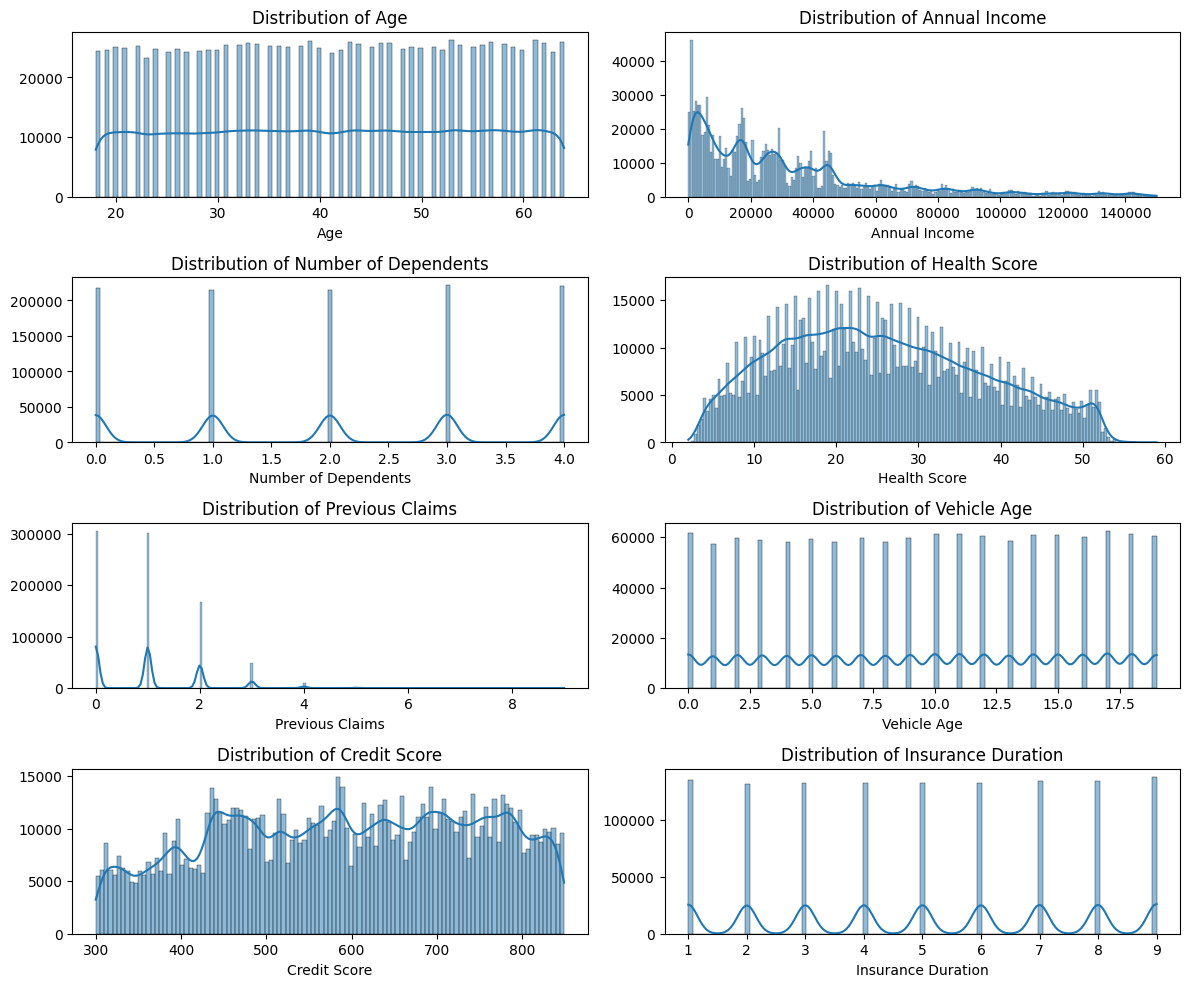

In [9]:
plt.figure(figsize=(12,12))

i = 0
def hist_plot(col):
    global i 
    i+=1
    plt.subplot(5,2,i)
    sns.histplot(x=train_df[col],kde=True)
    plt.xlabel(col)
    plt.ylabel("")
    plt.title(f"Distribution of {col}")

for col in numeric_columns:
    hist_plot(col)
plt.tight_layout()
plt.show()

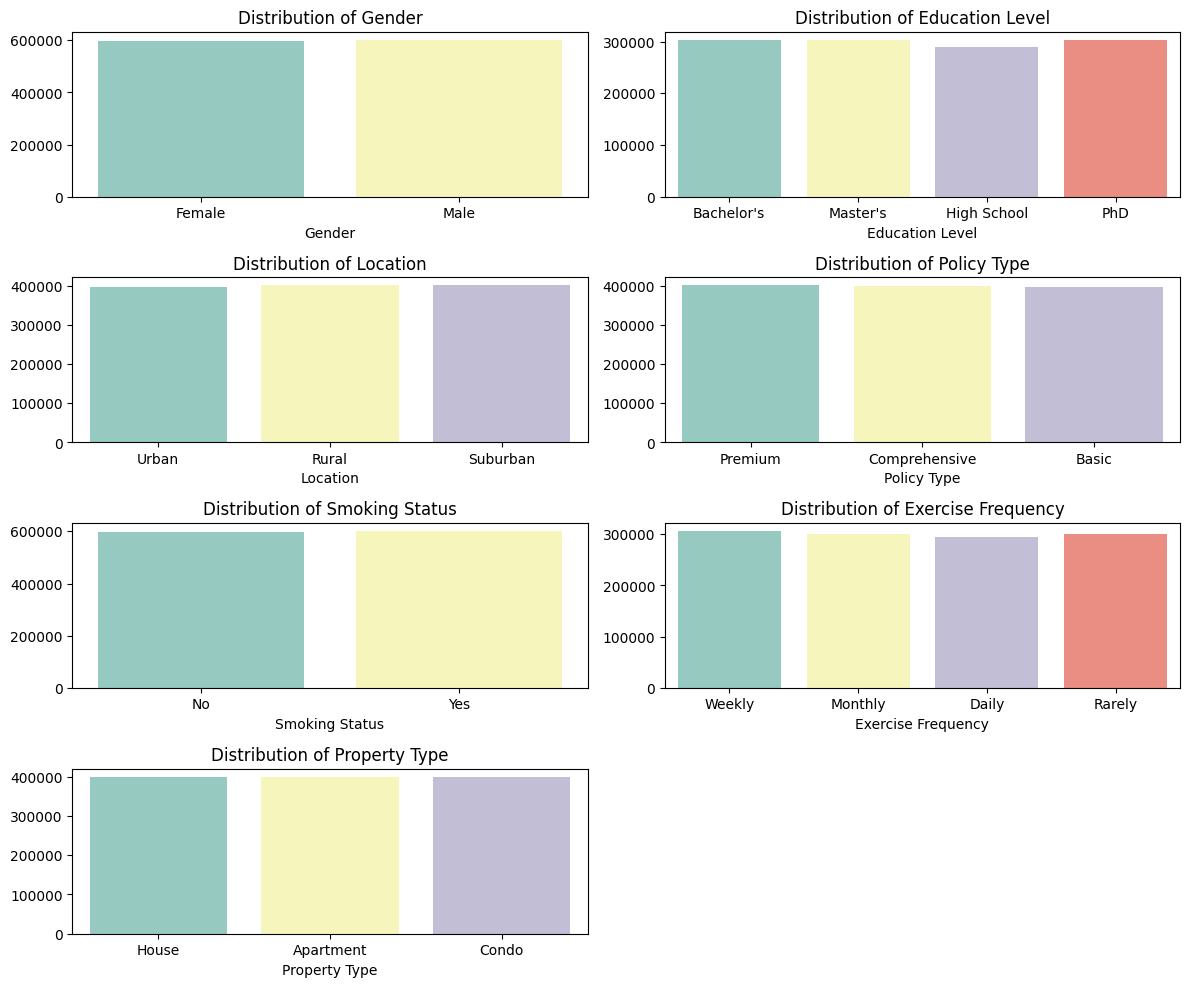

In [10]:
plt.figure(figsize=(12,12))

i = 0
def count_plot(col):
    global i 
    i+=1
    plt.subplot(5,2,i)
    sns.countplot(x=train_df[col],palette="Set3")
    plt.xlabel(col)
    plt.ylabel("")
    plt.title(f"Distribution of {col}")

for col in ['Gender','Education Level','Location','Policy Type','Smoking Status','Exercise Frequency','Property Type']:
    count_plot(col)
plt.tight_layout()

plt.show()

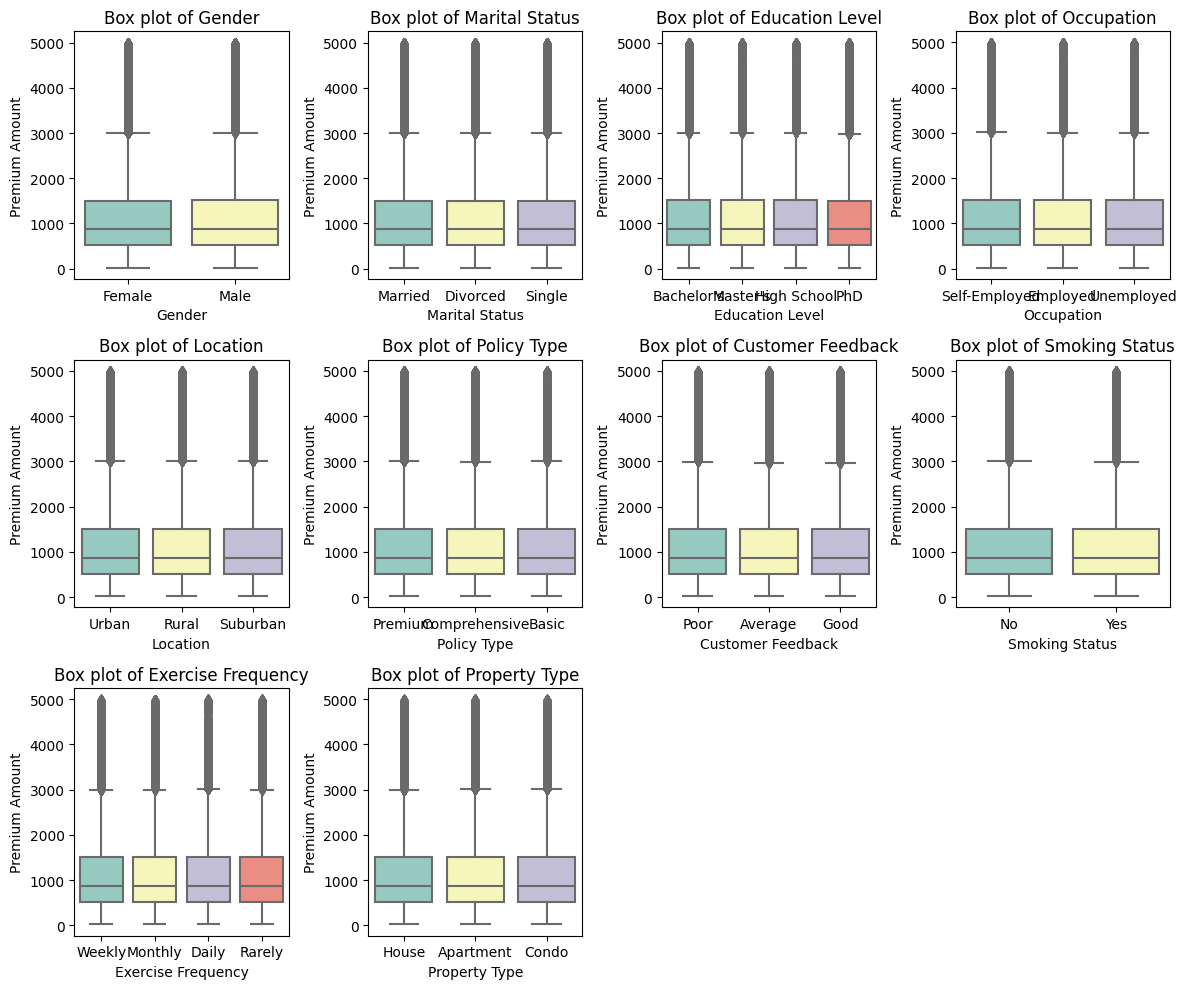

In [11]:
plt.figure(figsize=(12,10))
for i,col in enumerate(categorical_columns):
    plt.subplot(3,4,i+1)
    sns.boxplot(x=train_df[col],y=train_df['Premium Amount'],palette ='Set3')
    plt.title(f"Box plot of {col}")
plt.tight_layout()
plt.show()

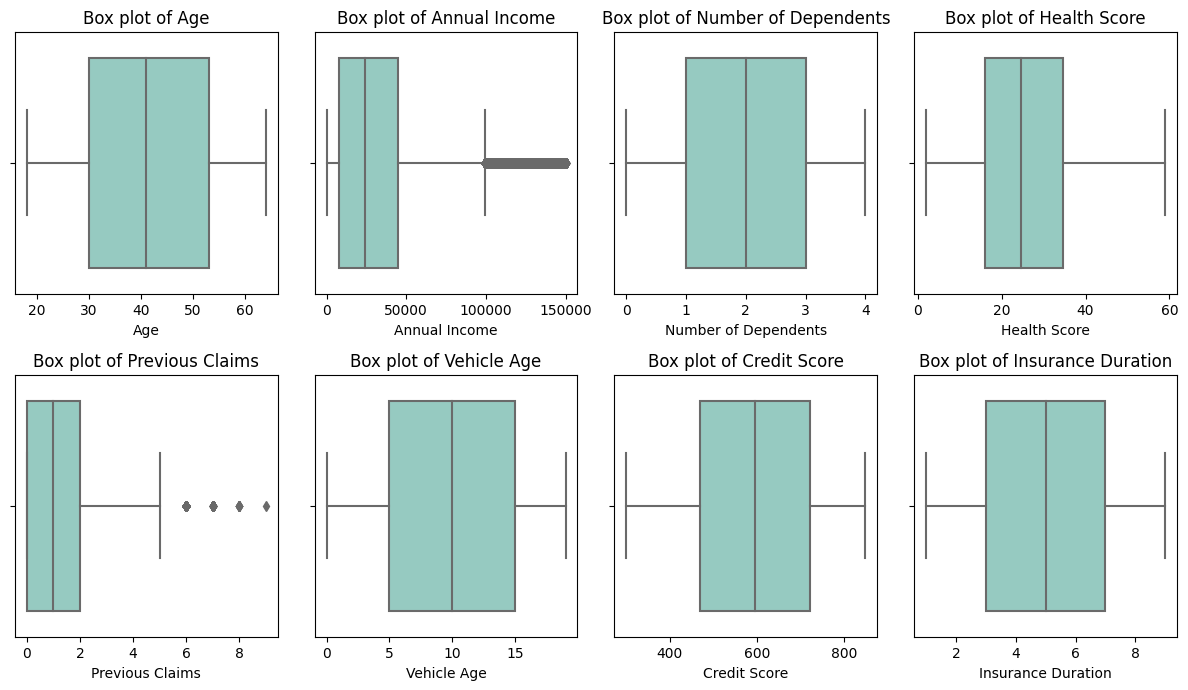

In [12]:
plt.figure(figsize=(12,10))
for i,col in enumerate(numeric_columns):
    plt.subplot(3,4,i+1)
    sns.boxplot(x=train_df[col],palette ='Set3')
    plt.title(f"Box plot of {col}")
plt.tight_layout()
plt.show()

In [13]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

train_df[numeric_columns] = imputer.fit_transform(train_df[numeric_columns])
test_df[numeric_columns] = imputer.fit_transform(test_df[numeric_columns])

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

train_df[categorical_columns] = imputer.fit_transform(train_df[categorical_columns])
test_df[categorical_columns] = imputer.transform(test_df[categorical_columns])
 

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in categorical_columns:
    train_df[col] = encoder.fit_transform(train_df[col])
    test_df[col] = encoder.transform(test_df[col])

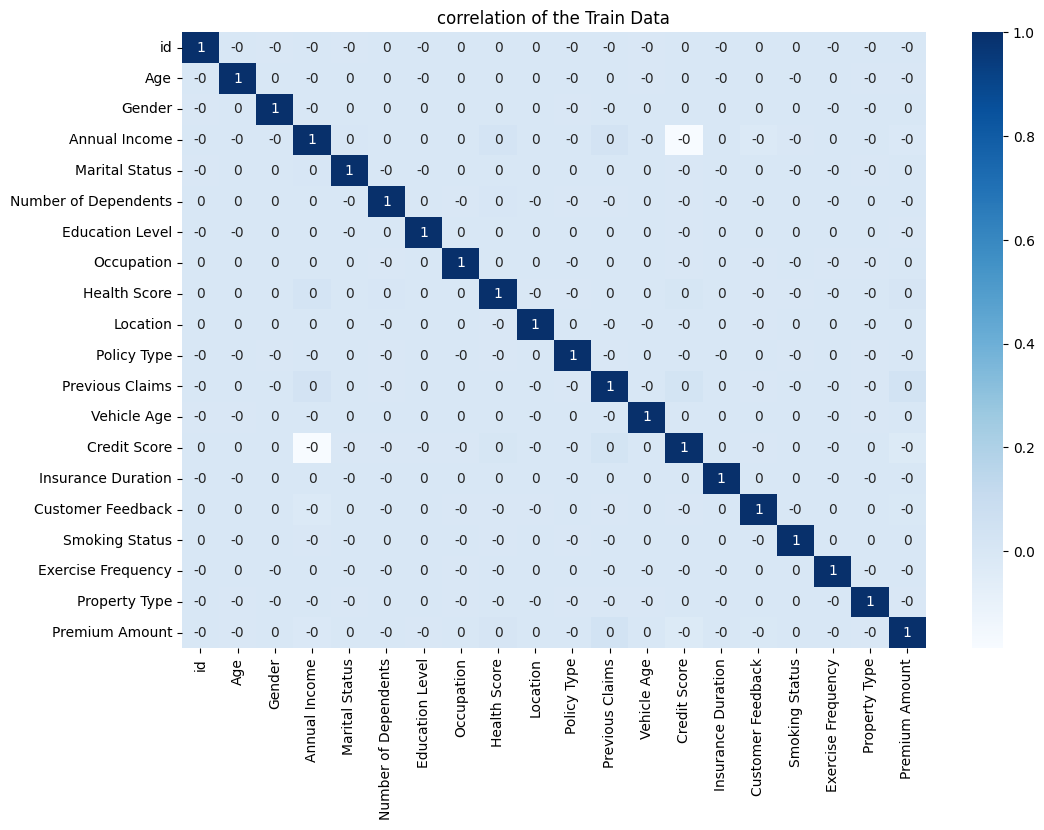

In [15]:
corr = train_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap='Blues',fmt='.0f')
plt.title("correlation of the Train Data")
plt.show()

Highly No Correlation Between Data

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_df[numeric_columns] = scaler.fit_transform(train_df[numeric_columns])
test_df[numeric_columns] = scaler.transform(test_df[numeric_columns]) 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error
train_dff = train_df.drop(columns='id')
test_dff = test_df.drop(columns='id')

X = train_dff.drop(columns=['Premium Amount'])
y = train_dff['Premium Amount']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =42)

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(960000, 18) (960000,) (240000, 18) (240000,)


In [18]:
def evaluation_metrics(model,y_test,y_pred):
    mae = mean_absolute_error(y_pred,y_test)
    mse = mean_squared_error(y_pred,y_test)
    rmse = mse**0.5
    print("ML Model : ",model)
    print("Mean Absolute Error :",mae)
    print("Mean Absolute Error :",mse)
    print("Root mean Squared Error :",rmse)

In [19]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()

DT.fit(x_train,y_train)

y_pred = DT.predict(x_test)

evaluation_metrics("Decision Tree",y_test,y_pred)

ML Model :  Decision Tree
Mean Absolute Error : 903.366525
Mean Absolute Error : 1536489.9851916668
Root mean Squared Error : 1239.5523325748159


In [20]:
from xgboost import XGBRegressor


xgb = XGBRegressor(random_state =42,
                   n_estimators =20,
                   max_depth = 20,
                   learning_rate = 0.1,
                   eval_metric = mean_squared_error,
                   )

xgb.fit(x_train,y_train)

xgb_pred = xgb.predict(x_test)
evaluation_metrics("XGB Regressor",y_test,xgb_pred)

ML Model :  XGB Regressor
Mean Absolute Error : 657.895448875618
Mean Absolute Error : 753550.4972693229
Root mean Squared Error : 868.0728640323478


In [21]:
predictions = xgb.predict(test_dff)

<div style="background-color:#fad0c4; color:#355c7d; text-align:center; padding:15px; border-radius:15px; font-size:25px; ">Submission</div>

In [22]:
res = pd.DataFrame({"id":test_df["id"],
                   "Premium Amount":predictions})
res = res.set_index("id")
res

,Premium Amount
id,
1200000,1411.475586
1200001,1152.102173
1200002,1047.149780
1200003,1132.681763
1200004,1184.692627
...,...
1999995,886.604309
1999996,2062.829834
1999997,1308.653442


In [23]:
res.to_csv("Submission.csv")